# Capstone Project - Road Accident Severity Prediction

## Introduction: Business Understanding

Road accidents lead to fatalities and economic losses. Thus, <b>preventing loss of life and property</b> is a topic of concern. <br>

The Seattle government can deploy a system that can alert drivers, health system, and police to remind them to practice caution and alertness in case of an incident. As a step towards this solution I will be building a model than will <b>predict the severity of an accident.</b><br> 

This model can be the <b>driving mechanism</b> that could <b>warn people</b>, given the weather and the road conditions about the <b>possibility of a car accident and how severe</b> it would be, so that they would <b>drive more carefully or even change their travel</b> if possible. <br>

In accident severity modeling, the <b>input vectors</b> are the characteristics of the accident, such as <b>driver behavior and attributes of vehicle, highway and environment characteristics</b> while the <b>output vector</b> is the corresponding <b>class of accident severity.</b><br>

By recognizing the <b>key factors that influence accident severity</b>, the solution may be of great utility to various <b>Government Departments/Authorities like Police, R&B and Transport</b> from public policy point of view. <br>

The results of analysis and modeling can be used by these Departments to take appropriate measures to <b>reduce accident impact</b> and thereby <b>improve traffic safety</b>. It is also useful to the Insurers in terms of reduced claims and better underwriting as well as rate making.

## Data

These traffic records were collected by the <b>SPD (Seattle Police Department).</b> <br>
The time-frame of this data is from <b>2004 to present.</b><br>
The data consists of <b>37 attributes and 194,673 collision records</b>. <br>
The dependent variable, <b>“SEVERITYCODE”</b>, contains numbers that correspond to different <b>levels of severity</b> caused by an accident from 0 to 4.

<b>Severity codes are as follows:
- 0: Little to no Probability (Clear Conditions)
- 1: Very Low Probability — Chance or Property Damage
- 2: Low Probability — Chance of Injury
- 3: Mild Probability — Chance of Serious Injury
- 4: High Probability — Chance of Fatality</b>
Following is a table of all the attributes along with their data types, variable length and a description for understanding.<br> This Meta-data is provided by the <b>SDOT Traffic Management Division.</b>

|Attribute          |Data type, length| Description                                                 |
|:------------------|:----------------|:------------------------------------------------------------|
|LOCATION           | Text, 255       |Description of the general location of the collision         | 
|EXCEPTRSNCODE      | Text, 10        |                                                             |
|EXCEPTRSNDESC      | Text, 300       |                                                             |
|SEVERITYCODE       | Text, 100       |A code that corresponds to the severity of the collision:
|                   |                 |3—fatality, 2b—serious injury, 2—injury, 1—prop damage,0—unknown|
|SEVERITYDESC       |Text             |A detailed description of the severity of the collision|
|COLLISIONTYPE      |Text, 300        |Collision type|
|PERSONCOUNT        |Double           |The total number of people involved in the collision|
|PEDCOUNT           |Double           |The number of pedestrians involved in the collision. |
|PEDCYLCOUNT        |Double           |The number of bicycles involved in the collision.|
|VEHCOUNT           |Double           |The number of vehicles involved in the collision.|
|INJURIES           |Double           |The number of total injuries in the collision.|
|SERIOUSINJURIES    |Double           |The number of serious injuries in the collision.|
|FATALITIES         |Double           |The number of fatalities in the collision.|
|INCDATE            |Date             |The date of the incident.|
|INCDTTM            |Text, 30         |The date and time of the incident.|
|JUNCTIONTYPE       |Text, 300        |Category of junction at which collision took place|
|SDOT_COLCODE       |Text, 10         |A code given to the collision by SDOT.|
|SDOT_COLDESC       |Text, 300        |A description of the collision corresponding to the collision code.|
|INATTENTIONIND     |Text, 1          |Whether or not collision was due to inattention.(Y/N)|
|UNDERINFL          |Text, 10         |Whether or not a driver involved was under the influence of drugs or alcohol.| 
|WEATHER            |Text, 300        |A description of the weather conditions during the time of the collision.|
|ROADCOND           |Text, 300        |The condition of the road during the collision.|
|LIGHTCOND          |Text, 300        |The light conditions during the collision.|
|PEDROWNOTGRNT      |Text, 1          |Whether or not the pedestrian right of way was not granted. (Y/N)|
|SDOTCOLNUM         |Text, 10         |A number given to the collision by SDOT.|
|SPEEDING           |Text, 1          |Whether or not speeding was a factor in the collision. (Y/N)|
|ST_COLCODE         |Text, 10         |A code provided by the state that describes the collision|
|ST_COLDESC         |Text, 300        |A description that corresponds to the state’s coding designation.|
|SEGLANEKEY         |Long             |A key for the lane segment in which the collision occurred.|
|CROSSWALKKEY       |Long             |A key for the crosswalk at which the collision occurred.|
|HITPARKEDCAR       |Text, 1          |Whether or not the collision involved hitting a parked car. (Y/N) |

<H4> As observed in the meta-data the severity code has 4 classes. Thus, this is a multi-class regression problem.<br>
I intend to build a machine learning model to predict the severity and classify it into the multi-class severity codes for public undertanding </H4>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import warnings
import gc
warnings.filterwarnings("ignore")
%matplotlib inline

### Data Loading

In [2]:
collisions_df = pd.read_csv('Collisions.csv')

In [3]:
collisions_df.head()

X          Y  OBJECTID  INCKEY  COLDETKEY   REPORTNO     STATUS  \
0 -122.320757  47.609408         1  328476     329976    EA08706    Matched   
1 -122.319561  47.662221         2  328142     329642    EA06882    Matched   
2 -122.327525  47.604393         3   20700      20700    1181833  Unmatched   
3 -122.327525  47.708622         4  332126     333626  M16001640  Unmatched   
4 -122.292120  47.559009         5  328238     329738    3857118  Unmatched   

  ADDRTYPE  INTKEY                                           LOCATION  ...  \
0    Block     NaN    BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE  ...   
1    Block     NaN     8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST  ...   
2    Block     NaN               JAMES ST BETWEEN 6TH AVE AND 7TH AVE  ...   
3    Block     NaN  NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NOR...  ...   
4    Block     NaN  M L KING JR ER WAY S BETWEEN S ANGELINE ST AND...  ...   

  ROADCOND                LIGHTCOND PEDROWNOTGRNT SDOTCOLNUM SPEEDING  \
0      Wet  Dark - Street Lights On           NaN        NaN      NaN   
1      Dry                 Daylight           NaN        NaN      NaN   
2      NaN                      NaN           NaN  4030032.0      NaN   
3      NaN                      NaN           NaN        NaN      NaN   
4      NaN                      NaN           NaN        NaN      NaN   

   ST_COLCODE                                         ST_COLDESC  SEGLANEKEY  \
0          11  From same direction - both going straight - bo...           0   
1          32                             One parked--one moving           0   
2         NaN                                                NaN           0   
3                                                            NaN           0   
4                                                            NaN           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             Y  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 40 columns]

In [4]:
collisions_df.info()
gc.collect()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 40 columns):
X                  213918 non-null float64
Y                  213918 non-null float64
OBJECTID           221389 non-null int64
INCKEY             221389 non-null int64
COLDETKEY          221389 non-null int64
REPORTNO           221389 non-null object
STATUS             221389 non-null object
ADDRTYPE           217677 non-null object
INTKEY             71884 non-null float64
LOCATION           216801 non-null object
EXCEPTRSNCODE      100986 non-null object
EXCEPTRSNDESC      11779 non-null object
SEVERITYCODE       221388 non-null object
SEVERITYDESC       221389 non-null object
COLLISIONTYPE      195159 non-null object
PERSONCOUNT        221389 non-null int64
PEDCOUNT           221389 non-null int64
PEDCYLCOUNT        221389 non-null int64
VEHCOUNT           221389 non-null int64
INJURIES           221389 non-null int64
SERIOUSINJURIES    221389 non-null int64
FATALITIES     

11

### Cleaning the Dataset

Let's examine the lattitudnal and logitudnal data

In [5]:
collisions_df[['X','Y']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 2 columns):
X    213918 non-null float64
Y    213918 non-null float64
dtypes: float64(2)
memory usage: 3.4 MB


In [6]:
collisions_df[['X','Y']].isna().sum()

X    7471
Y    7471
dtype: int64

Dropping the rows having null values in the logitudnal and lattitudnal data columns

In [7]:
collisions_df = collisions_df.dropna(axis=0, subset=['X','Y'])

In [8]:
collisions_df[['X','Y']].isna().sum()

X    0
Y    0
dtype: int64

<H2>DATA PREPARATION</H2>
<H3>The data needs to pre-processed</H3>

The collisions dataset has been sourced from the <b>Seattle Open GeoData Portal</b> and is updated weekly, thus a several unique identifiers and spatial features are present in the dataset which will be irrelevant in further statistical analysis and model building.<br>  

Features like <b>OBJECTID, INCKEY, COLDETKEY, INTKEY and REPORTNO.</b> are the unique identifiers<br>

Features like <b>EXCEPTRSNCODE, EXCEPTRSNDESC and LOCATION</b> won't be contributing to our dataset.<br> 
The LOCATION data will help us in populating the maps and getting the count in a particular area but the lattitudes and logitudes and already in place to serve that purpose.<br>

Features like <b>INCDATE - Incident Date and INCDTTM - Incident Timestamp </b>, The timestamp column doesn't have consistent values. Most values do not contain the time. Let's maintain the incident date from INCDATE column<br>

Features like <b>SDOT_COLCODE and SDOT_COLDESC</b> are redundant, <b>ST_COLCODE, ST_COLDESC, SDOT_COLNUM </b> are the repeated features which shouldn't be considered in further analysis <br>

Feature like <b>COLLISIONTYPE</b> has some missing values, those can be filled by mapping the SDOT_COLDESC values, SDOT_COLDESC involves the collision description and can be used alongwith the SDOT_COLCODE to input null values.<br>

Features like <b>JUNCTIONTYPE, WEATHER, ROADCOND, LIGHTCOND</b> contain null values, it would be best to drop these rows.<br>

Features like <b>INATTENTIONIND, UNDERINFL, SPEEDING</b> are variables with binary values and has values input for only one class. Thus, we can induce the either value to account for all the blank cells. <br>

Feature <b>PEDROWNOTGRNT</b> has 95% null values and considering it for model building would create bias, thus its safe to exclude it.

Features like <b>SEGLANEKEY, CROSSWALKKEY, HITPARKEDCAR </b> should be examined, if they aren't correlated to the target variable then they should be excluded, it can be conceived as noise.

In [9]:
#The INCDATE column has the date and its has zeroes for time (00:00:00), 
#So we can just keep the date and convert it into a datetime 

In [10]:
collisions_df['INCDATE']= pd.to_datetime(collisions_df['INCDATE']) 
collisions_df['INCDATE'] = collisions_df['INCDATE'].dt.date

In [11]:
# Filling the collision type missing values
# Create a dictionary by zipping the Collision types and SDOT_Col codes and their description
# Filling the missing values with the corresponding collision types

In [12]:
collision_type = dict(zip(collisions_df.SDOT_COLCODE,collisions_df.COLLISIONTYPE))
collision_sdot = dict(zip(collisions_df.SDOT_COLCODE,collisions_df.SDOT_COLDESC))

In [13]:
collisions_df.COLLISIONTYPE = collisions_df.COLLISIONTYPE.fillna(collisions_df.SDOT_COLCODE.map(collision_type))

In [14]:
collisions_df['COLLISIONTYPE'].isna().sum()

8797

In [15]:
coll_na = collisions_df.loc[collisions_df['COLLISIONTYPE'].isna(), 'SDOT_COLCODE']

In [16]:
coll_na.value_counts()

0.0     8244
12.0     322
15.0     230
Name: SDOT_COLCODE, dtype: int64

In [17]:
codes = [0,12,15]
descs = [collision_sdot[k] for k in codes if k in collision_sdot]
print(descs)

['NOT ENOUGH INFORMATION / NOT APPLICABLE', 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE', 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE']


<b>Lets substitue 'COLLISIONTYPE' as 'Other' for 'SDOT_COLCODE' - 0, 'Angles' for 12 and 'Sideswipe' for 15</b>

In [18]:
collisions_df.loc[collisions_df['SDOT_COLCODE'] == 0, 'COLLISIONTYPE'] = 'Other'
collisions_df.loc[collisions_df['SDOT_COLCODE'] == 12, 'COLLISIONTYPE'] = 'Angles'
collisions_df.loc[collisions_df['SDOT_COLCODE'] == 15, 'COLLISIONTYPE'] = 'Sideswipe'

In [19]:
collisions_df = collisions_df.dropna(axis=0, subset=['COLLISIONTYPE'])
collisions_df['COLLISIONTYPE'].isna().sum()

0

In [20]:
# Let us examine columns JUNCTIONTYPE, WEATHER, ROADCOND, LIGHTCOND

In [21]:
collisions_df[['JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].isna().sum()

JUNCTIONTYPE     8189
WEATHER         24198
ROADCOND        24119
LIGHTCOND       24285
dtype: int64

<b>JUNCTIONTYPE</b> has 4% of its values missing <br>
While <b>WEATHER, ROADCOND, LIGHTCOND</b> have almost 10% of their data missing. These numbers aren't very large and we make do with the remaining 90% of the data. <br> Drop the missing value rows from these features

In [22]:
collisions_df = collisions_df.dropna(axis=0, subset=['JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'])

In [23]:
#Let's examine column INATTENTIONIND - Incident due to not paying attention on the road

In [24]:
collisions_df['INATTENTIONIND'].value_counts()

Y    29164
Name: INATTENTIONIND, dtype: int64

In [25]:
collisions_df['INATTENTIONIND'].isna().sum()

156174

In [26]:
#We will fill the missing places with zero and map value 1 for those values of Y

In [27]:
collisions_df['INATTENTIONIND'] = collisions_df['INATTENTIONIND'].map({'Y': 1})

In [28]:
collisions_df['INATTENTIONIND'] = collisions_df['INATTENTIONIND'].fillna(0)

In [29]:
collisions_df['INATTENTIONIND'].value_counts()

0.0    156174
1.0     29164
Name: INATTENTIONIND, dtype: int64

In [30]:
#Let's examine column UNDERINFL - Incident when driver was under the influence of drugs/alcohol

In [31]:
collisions_df['UNDERINFL'].value_counts()

N    97263
0    78770
Y     5200
1     4104
Name: UNDERINFL, dtype: int64

In [32]:
collisions_df['UNDERINFL'] = collisions_df['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})

In [33]:
collisions_df['UNDERINFL'].value_counts()

0.0    176033
1.0      9304
Name: UNDERINFL, dtype: int64

In [34]:
collisions_df['UNDERINFL'].isna().sum()

1

In [35]:
collisions_df = collisions_df.dropna(axis=0, subset=['UNDERINFL'])

In [36]:
##Let's examine column SPEEDING - Incident when driver was speeding the vehicle

In [37]:
collisions_df['SPEEDING'] = collisions_df['SPEEDING'].map({'Y': 1})
collisions_df['SPEEDING'].replace(np.nan, 0, inplace=True)

In [38]:
collisions_df['SPEEDING'].value_counts()

0.0    176112
1.0      9225
Name: SPEEDING, dtype: int64

In [39]:
#Let's examine the 3 columns: 'SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'

In [40]:
collisions_df[['SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR']].nunique()

SEGLANEKEY      2049
CROSSWALKKEY    2305
HITPARKEDCAR       2
dtype: int64

Features <b>SEGLANEKEY and CROSSWALKKEY</b> have more than 2000 categories, and creating 2000< dummies isn't wise, thus it is safe to exclude them for the further analysis <br>

Feature <b>HITPARKEDCAR</b> is a binary feature but this feature is already serving it's purpose in the COLLISIONTYPE - Parked Car, Thus it is safe to exclude this feature for the further analysis</b>

There are some records in this dataset where the values are unknown, these records may create a bias in our models, It's best to drop them. <br>
- <b>COLLISIONTYPE</b> has Other category
- <b>JUNCTIONTYPE</b> has Unknown category
- <b>WEATHER</b> has Unknown and Other category
- <b>ROADCOND</b> has Unknown and Other category
- <b>LIGHTCOND</b> has Other and Unknown lighting category
- <b>SEVERITYCODE</b> has '0' category

In [41]:
collisions_df.drop(collisions_df[collisions_df['COLLISIONTYPE'] == 'Other'].index, inplace = True) 

In [42]:
collisions_df.drop(collisions_df[collisions_df['JUNCTIONTYPE'] == 'Unknown'].index, inplace = True) 

In [43]:
collisions_df.drop(collisions_df[collisions_df['WEATHER'] == 'Other'].index, inplace = True)
collisions_df.drop(collisions_df[collisions_df['WEATHER'] == 'Unknown'].index, inplace = True)

In [44]:
collisions_df.drop(collisions_df[collisions_df['ROADCOND'] == 'Other'].index, inplace = True)
collisions_df.drop(collisions_df[collisions_df['ROADCOND'] == 'Unknown'].index, inplace = True)

In [45]:
collisions_df.drop(collisions_df[collisions_df['LIGHTCOND'] == 'Other'].index, inplace = True)
collisions_df.drop(collisions_df[collisions_df['LIGHTCOND'] == 'Unknown'].index, inplace = True)

In [46]:
collisions_df.drop(collisions_df[collisions_df['SEVERITYCODE'] == '0'].index, inplace = True) 

|SEVERITYCODE|MEANING|         
|:-----------:|:---------------:|
|1  |	Accidents resulting in property damage|
|2  |	Accidents resulting in injuries|
|2b |	Accidents resulting in serious injuries|
|3	|   Accidents resulting in fatalities|

Convert <b>INCDATE</b> to type <b>'datetime'</b>

Convert the categorical columns:<br> 
<b>COLLISIONTYPE, JUNCTIONTYPE, WEATHER, ROADCOND, LIGHTCOND, SPEEDING, UNDERINFL, INATTENTIONIND</b> to datatype <B>'category'</B>

In [47]:
collisions_df["INCDATE"] = pd.to_datetime(collisions_df["INCDATE"])

In [48]:
cat_cols = ['COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING',
            'UNDERINFL','INATTENTIONIND', 'SEVERITYCODE']
collisions_df[cat_cols] = collisions_df[cat_cols].astype('category')

<H4> LET'S SELECT THE RELEVANT FEATURES AS OUR FINAL CLAEN DATASET FUR FURTHER DATA ANALYSIS</H4>

In [49]:
colisn_df = collisions_df[['X','Y','INCDATE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING',
                           'UNDERINFL','INATTENTIONIND','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INJURIES',
                          'SERIOUSINJURIES','FATALITIES','SEVERITYCODE']]

In [50]:
colisn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147105 entries, 0 to 221388
Data columns (total 19 columns):
X                  147105 non-null float64
Y                  147105 non-null float64
INCDATE            147105 non-null datetime64[ns]
COLLISIONTYPE      147105 non-null category
JUNCTIONTYPE       147105 non-null category
WEATHER            147105 non-null category
ROADCOND           147105 non-null category
LIGHTCOND          147105 non-null category
SPEEDING           147105 non-null category
UNDERINFL          147105 non-null category
INATTENTIONIND     147105 non-null category
PERSONCOUNT        147105 non-null int64
PEDCOUNT           147105 non-null int64
PEDCYLCOUNT        147105 non-null int64
VEHCOUNT           147105 non-null int64
INJURIES           147105 non-null int64
SERIOUSINJURIES    147105 non-null int64
FATALITIES         147105 non-null int64
SEVERITYCODE       147104 non-null category
dtypes: category(9), datetime64[ns](1), float64(2), int64(7)
memory us

There seems to be one record with a null value in SEVERITYCODE column. Let's examine the record and fill the null place with appropriate value

In [51]:
colisn_df[pd.isnull(colisn_df).any(axis=1)]

X          Y    INCDATE COLLISIONTYPE  \
195397 -122.327646  47.630597 2018-02-14        Cycles   

                                  JUNCTIONTYPE   WEATHER ROADCOND LIGHTCOND  \
195397  At Intersection (intersection related)  Overcast      Wet  Daylight   

       SPEEDING UNDERINFL INATTENTIONIND  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  \
195397      0.0       0.0            0.0            2         0            1   

        VEHCOUNT  INJURIES  SERIOUSINJURIES  FATALITIES SEVERITYCODE  
195397         1         0                0           0          NaN

This record indicates that there was a collision between a ccycle and a vehicle and 2 people were involved, possibility of property damage. Thus, we can impute severity code of 1 for this record

In [52]:
colisn_df['SEVERITYCODE'].fillna('1', axis=0,inplace=True)

In [53]:
colisn_df[colisn_df.index == 195397] 

X          Y    INCDATE COLLISIONTYPE  \
195397 -122.327646  47.630597 2018-02-14        Cycles   

                                  JUNCTIONTYPE   WEATHER ROADCOND LIGHTCOND  \
195397  At Intersection (intersection related)  Overcast      Wet  Daylight   

       SPEEDING UNDERINFL INATTENTIONIND  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  \
195397      0.0       0.0            0.0            2         0            1   

        VEHCOUNT  INJURIES  SERIOUSINJURIES  FATALITIES SEVERITYCODE  
195397         1         0                0           0            1

## DATA UNDERSTANDING
### EXPLORATORY DATA ANALYSIS

The dataset consists of X and Y coordinates of the incidents. We can use folium maps to plot those incidents on a seattle map. That would help us recognize areas where most of the accidents occur and we might be able to derive insights from it.

In [54]:
#Seattle lattitude and longitudes
latitude = 47.60
longitude = -122.33

In [55]:
# create map and display it
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)


Now let's superimpose the locations of the accidents onto the map. The way to do that in Folium is to create a feature group with its own features and style and then add it to the seattle_map.

So the dataframe consists of 185,335 incidents, which took place from 2004 to present. 
In order to reduce computational cost, let's just work with the first 5000 incidents in this dataset.

In [56]:
df_incidents = colisn_df.iloc[0:5000, :]

In [57]:
df_incidents.shape

(5000, 19)

In [58]:
from folium import plugins

# let's start again with a clean copy of the map of Seattle
seattle_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.COLLISIONTYPE):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
seattle_map

In [102]:
seattle_map.save("seattle.png")

When you zoom out all the way, all markers are grouped into one cluster, the global cluster, of 5000 markers or incidents, which is the total number of incidents in our dataframe. Once you start zooming in, the global cluster will start breaking up into smaller clusters. Zooming in all the way will result in individual markers.

From the first 5000 incidents we can make out the following insights:
- <b>Belltown, Capitol Hill and First Hill</b> have the largest amount of incidents
- <b>Broadview, Magnolia and Faunteleroy</b> area have the lowest amount of incidents
- Other counties and areas have average amount of incidents reported

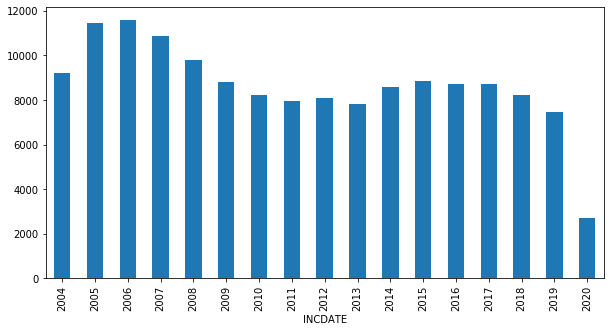

In [59]:
colisn_df.groupby([colisn_df['INCDATE'].dt.year])['INCDATE'].count().plot(kind='bar',figsize=(10,5),legend= None )

Above chart shows the trend in the incidents occured from 2004 to 2020. We can observe that the number of incidents substantially decreased since 2004. Evidently in the year 2020, the incidents have decreased more than half because people are avoiding going out due to the pandemic

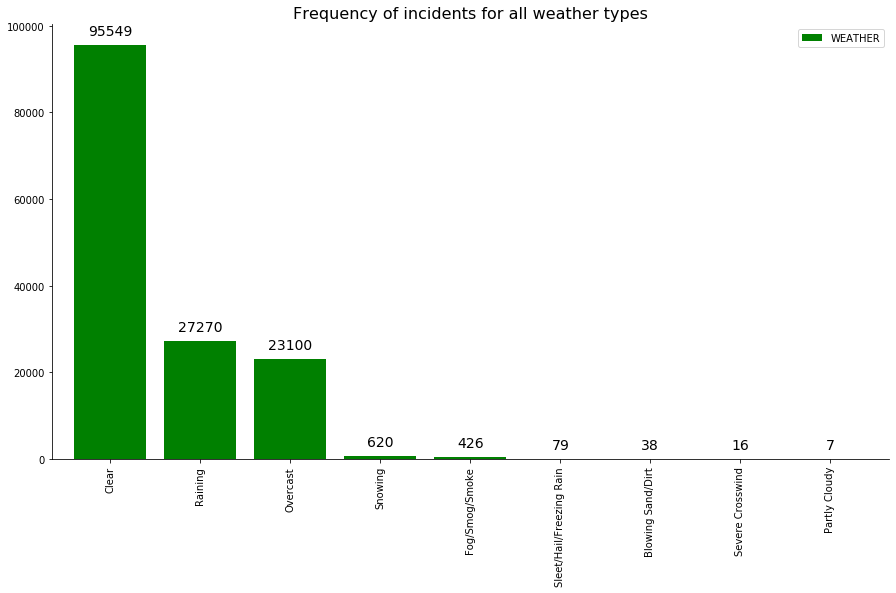

In [60]:
weather_plot = colisn_df['WEATHER'].value_counts().to_frame()

ax = weather_plot.plot(kind='bar', figsize = (15,8), width=0.8, color = 'g')
ax.set_title("Frequency of incidents for all weather types", fontsize= 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height()), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 14), textcoords='offset points',fontsize = 14)
plt.show()

Above chart gives us a count of incidents occured while the weather condition, we can see that <b>95549</b> incident ocurred when it was <b>clear</b> which is the highest reported count, while the lowest reported count is <b>7</b> incidents in 16 years when it was <b>partly cloudy</b>

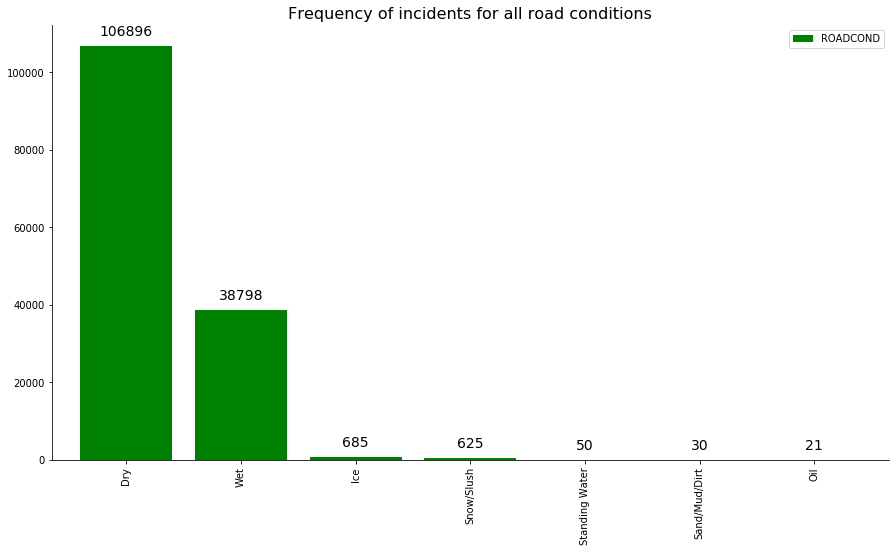

In [61]:
road_plot = colisn_df['ROADCOND'].value_counts().to_frame()

ax = road_plot.plot(kind='bar', figsize = (15,8), width=0.8, color = 'g')
ax.set_title("Frequency of incidents for all road conditions", fontsize= 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height()), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 14), textcoords='offset points',fontsize = 14)

plt.show()

Above chart gives us a count of incidents occured for the road condition, we can see that <b>106896</b> incident ocurred when it was <b>dry</b> which is the highest reported count, while the lowest reported count is <b>21</b> incidents in 16 years when <b>oil</b> was spilled on the road

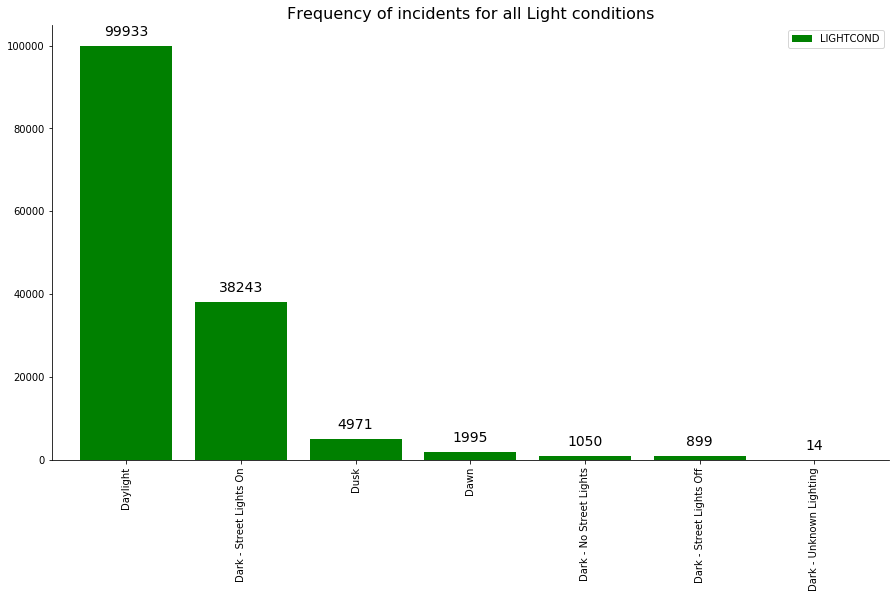

In [62]:
light_plot = colisn_df['LIGHTCOND'].value_counts().to_frame()

ax = light_plot.plot(kind='bar', figsize = (15,8), width=0.8, color = 'g')
ax.set_title("Frequency of incidents for all Light conditions", fontsize= 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height()), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 14), textcoords='offset points',fontsize = 14)
plt.show()

Above chart gives us a count of incidents occured for different light condition, we can see that <b>99933</b> incident ocurred when it was broad <b>daylight</b> which is the highest reported count, while the lowest count is <b>14</b> incidents in 16 years when it was <b>dark</b>

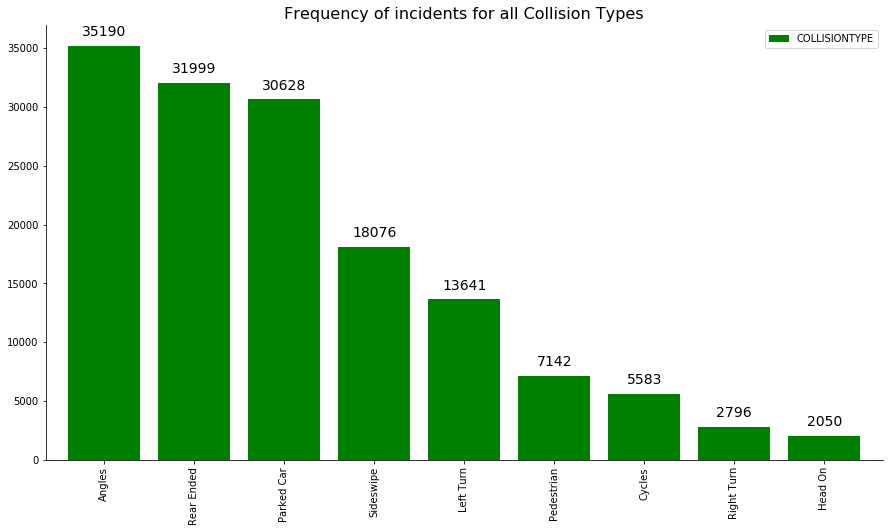

In [63]:
coll_plot = colisn_df['COLLISIONTYPE'].value_counts().to_frame()

ax = coll_plot.plot(kind='bar', figsize = (15,8), width=0.8, color = 'g')
ax.set_title("Frequency of incidents for all Collision Types", fontsize= 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height()), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 14), textcoords='offset points',fontsize = 14)
plt.show()

Above chart gives us a count of incidents occured for all types of collisions, we can see that collions with <b>angles, rear- ended parked car </b>were the types with highest number of collisions, while a <b>head-on collision</b> is with lowest count

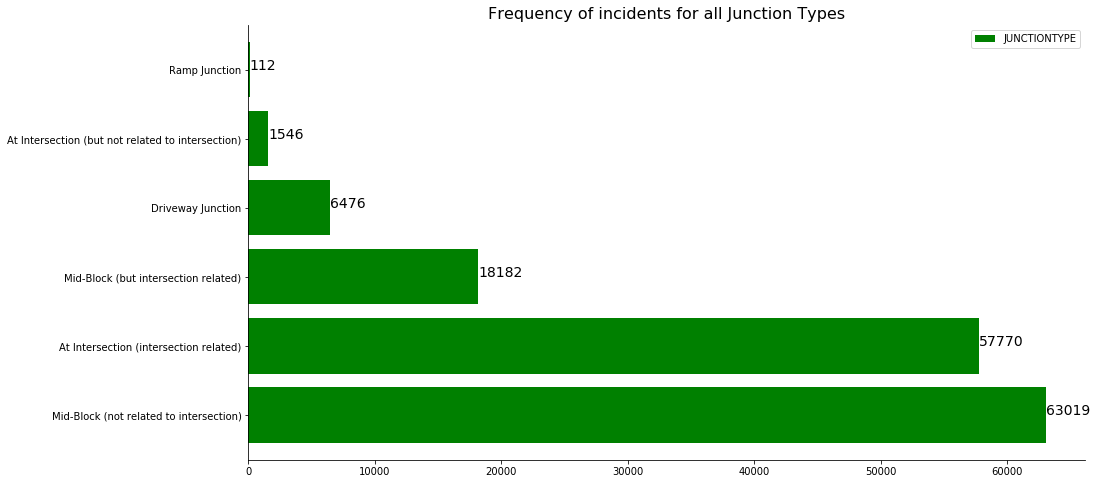

In [64]:
junc_plot = colisn_df['JUNCTIONTYPE'].value_counts().to_frame()

ax = junc_plot.plot(kind='barh', figsize = (15,8), width=0.8, color = 'g')
ax.set_title("Frequency of incidents for all Junction Types", fontsize= 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
        count = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() +0.1
        y = p.get_y() + p.get_height()/2
        ax.annotate(count, (x, y), fontsize=14)
plt.show()

Above chart gives us a count of incidents occured at the different junction types, we can see that <b>63019</b> incident ocurred <b>Mid-Block</b> which is the highest reported count, while incidents at <b>Intersections</b> are <b>57770</b> and only <b>112</b> incidents occured at a <b>Ramp Junction</b>

Text(0.5, 1.0, 'Frequency of incidents reported as SPEEDING')

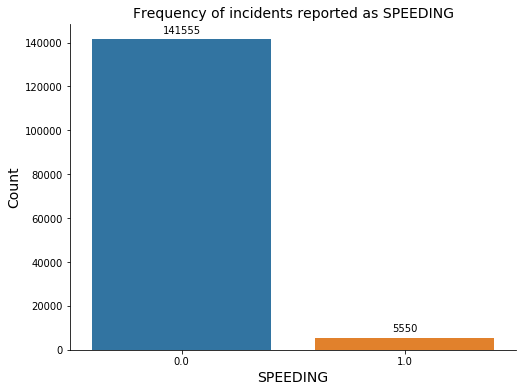

In [65]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="SPEEDING",data=colisn_df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("SPEEDING", size=14)
plt.ylabel("Count", size=14)
plt.title("Frequency of incidents reported as SPEEDING", fontsize = 14)

From 2004 to 2020, <b>5550</b> incidents occured because of <b>speeding</b>

Text(0.5, 1.0, 'Frequency of incidents reported Under Influence(D/A) ')

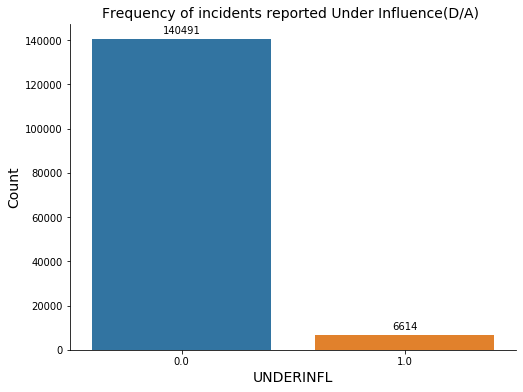

In [66]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="UNDERINFL",data=colisn_df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("UNDERINFL", size=14)
plt.ylabel("Count", size=14)
plt.title("Frequency of incidents reported Under Influence(D/A) ", fontsize = 14)

From 2004 to 2020, <b>6614</b> incidents occured because of the driver was <b>under the influence of drugs or alcohol</b>

Text(0.5, 1.0, 'Frequency of incidents reported as Inattention ')

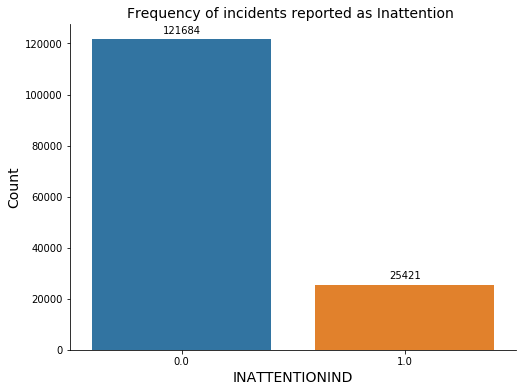

In [67]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="INATTENTIONIND",data=colisn_df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("INATTENTIONIND", size=14)
plt.ylabel("Count", size=14)
plt.title("Frequency of incidents reported as Inattention ", fontsize = 14)

From 2004 to 2020, <b>25421<b> incidents occured because of the driver was <b>not paying attention on the road</b>

Text(0.5, 1.0, 'Distribution of people across severity code ')

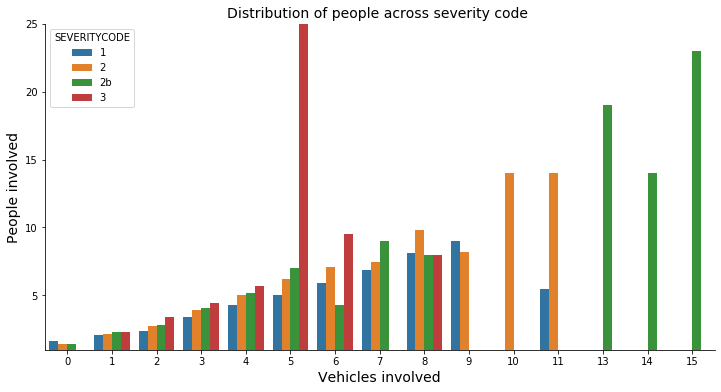

In [68]:
plt.figure(figsize=(12,6))

ax = sns.barplot(x = 'VEHCOUNT',y = 'PERSONCOUNT', data = colisn_df, hue = 'SEVERITYCODE', ci=None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(ylim=(1, 25))



plt.xlabel("Vehicles involved", size=14)
plt.ylabel("People involved", size=14)
plt.title("Distribution of people across severity code ", fontsize = 14)

Above plot gives us a distribution of vehicles involved and the people involved across the 4 severity codes. As we can see, as the number of vehicles increase, the people involved in the incident also increases. We see an upsurge in people involved at 5 vehicles for severity code - 3, which is 'Fatalities' 

Text(0.5, 1.0, 'Distribution of injuries across severity code ')

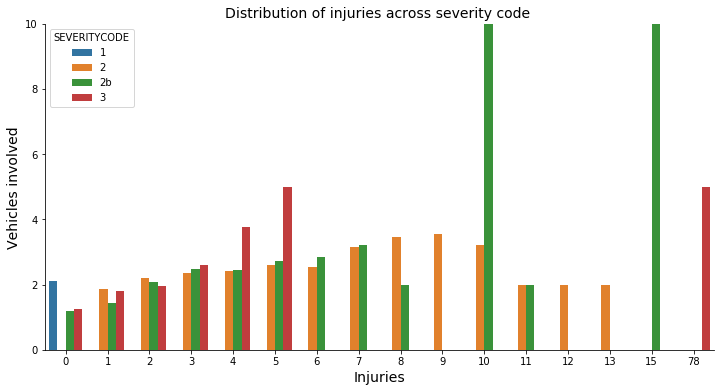

In [69]:
plt.figure(figsize=(12,6))

ax = sns.barplot(x = 'INJURIES',y = 'VEHCOUNT', data = colisn_df, hue = 'SEVERITYCODE',ci = None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(ylim=(0, 10))

plt.xlabel("Injuries", size=14)
plt.ylabel("Vehicles involved", size=14)
plt.title("Distribution of injuries across severity code ", fontsize = 14)

Above plot gives us a distribution of vehicles involved and the injuries conceived across the 4 severity codes. As we can see, as the number of vehicles increase, the injuries in the incident also increases. We see an upsurge in 81 injuries for 5 vehicles for severity code - 3, which is 'Fatalities'

Text(0.5, 1.0, 'Distribution of serious_injuries across severity code ')

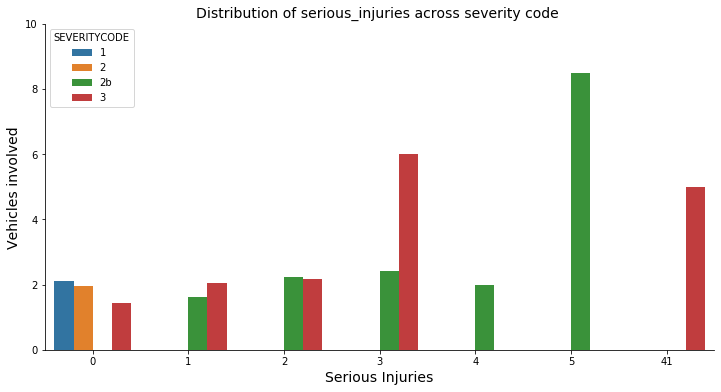

In [70]:
plt.figure(figsize=(12,6))

ax = sns.barplot(x = 'SERIOUSINJURIES',y = 'VEHCOUNT', data = colisn_df, hue = 'SEVERITYCODE',ci = None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(ylim=(0, 10))

plt.xlabel("Serious Injuries", size=14)
plt.ylabel("Vehicles involved", size=14)
plt.title("Distribution of serious_injuries across severity code ", fontsize = 14)

Above plot gives us a distribution of vehicles involved and the serious injuries count across the 4 severity codes. As we can see, as the number of vehicles increase, the serious injuries in the incident also increases. We see an upsurge in serious injuriers, 43 at 5 vehicles for severity code - 3, which is 'Fatalities'

In [71]:
col_fat = colisn_df.groupby('COLLISIONTYPE')['FATALITIES'].sum()
col_fat.reset_index()

COLLISIONTYPE  FATALITIES
0        Angles          26
1        Cycles          24
2       Head On          23
3     Left Turn          16
4    Parked Car           7
5    Pedestrian         128
6    Rear Ended          12
7    Right Turn           1
8     Sideswipe           9

Text(0.5, 1.0, 'Distribution of Fatalities and Vehicles involved ')

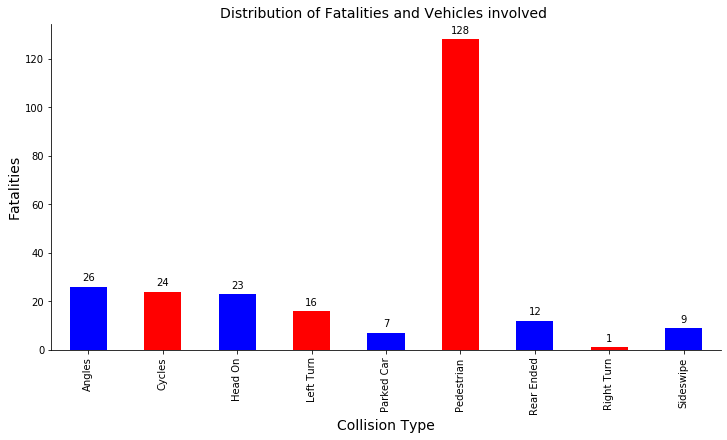

In [72]:
plt.figure(figsize=(12,6))

ax = col_fat.plot(kind = 'bar', color=['blue','red'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.ylabel("Fatalities", size=14)
plt.xlabel("Collision Type", size=14)
plt.title("Distribution of Fatalities and Vehicles involved ", fontsize = 14)


Above bar plot gives a count of the number of Fatalities across all the collision types. As observed, Pedestrian has the highest count. While Right Turn, Parked car has the lowest number of Fatalities 

Text(0.5, 1.0, 'Frequency of Severity Codes ')

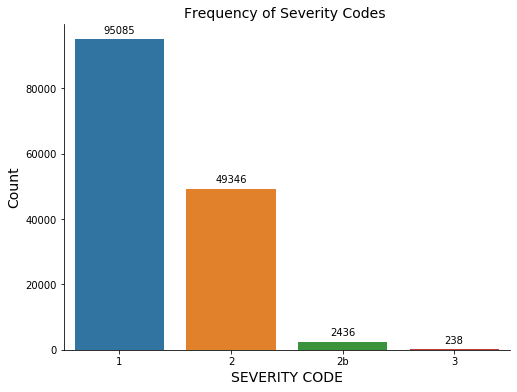

In [77]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="SEVERITYCODE",data=colisn_df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("SEVERITY CODE", size=14)
plt.ylabel("Count", size=14)
plt.title("Frequency of Severity Codes ", fontsize = 14)

Above plot gives the number of incidents reported over the last 16 years across the 4 severity codes. It's observed that severity code <b>1 - Accidents involving property damage</b> have the highest count and severity code <b>3 - Accidents involving Fatalities</b> have the lowest count  

Text(0.5, 1, 'Correlation Matrix')

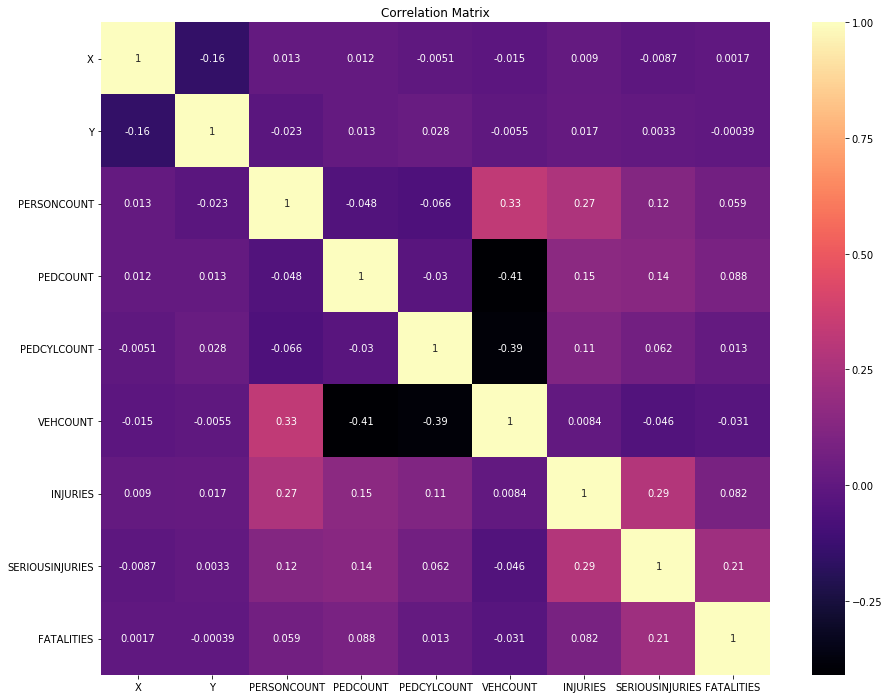

In [73]:
hm = colisn_df.corr()
plt.subplots(figsize=(15,12))
ax = sns.heatmap(hm, annot=True, cmap='magma')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Matrix')

Above is the correlation plot of all the numerical variables in this dataset
- Person count and Vehicle have a positive yet moderate correlation of 0.33
- Person count and Injuries have a positive yet moderate correlation of 0.27
- Pedestrian count and Pedcycle count are negatively correlated to vehicle count of -0.41 and -0.39
- X and Y coordinates have negative correlation with each other
- Injuries and Serious Injuries have a weak yet positive correlation of 0.29
- Serious Injuries and Fatalities have a weak yet positive correlation of 0.21
- All other variables are very weakly correlated

Thus, we need to normaliza the data for further analysis.

### Feature Engineering

We need to redefine the severity codes with all integer values because model won't compare 
between a predicted float value and the string values in test data

In [74]:
collisions_df['SEVERITYCODE'] = collisions_df['SEVERITYCODE'].map({'1': 1, '2': 2, '2b': 3, '3': 4})

In [75]:
collisions_df['SEVERITYCODE'].value_counts()

1    95084
2    49346
3     2436
4      238
Name: SEVERITYCODE, dtype: int64

As the data is highly unbalanced we need to normalize it. We have a column INCDATE, which is of date time format, and it cannot be scaled and transformed, thus we will drop it

We need do one-hot encoding of all the categorical variables, in order to make all the variables numeric which will be beneficial of our model

In [78]:
collisions = pd.get_dummies(colisn_df['COLLISIONTYPE'],prefix = 'coltyp_')
junctions = pd.get_dummies(colisn_df['JUNCTIONTYPE'],prefix = 'juntyp_')
weathers = pd.get_dummies(colisn_df['WEATHER'],prefix = 'wthr_')
roads = pd.get_dummies(colisn_df['ROADCOND'],prefix = 'road_')
lights = pd.get_dummies(colisn_df['LIGHTCOND'],prefix = 'light_')
speeds = pd.get_dummies(colisn_df['SPEEDING'],prefix = 'speed_')
influence = pd.get_dummies(colisn_df['UNDERINFL'],prefix = 'influ_')
attention = pd.get_dummies(colisn_df['INATTENTIONIND'],prefix = 'inattentn_')

After one-hot encoding we need to concatenate these dummies to the original dataset and also drop the original feature columns as their purpose has been served by the dummies.

In [79]:
colisn_df = pd.concat([colisn_df,collisions],axis=1)
colisn_df = pd.concat([colisn_df,junctions],axis=1)
colisn_df = pd.concat([colisn_df,weathers],axis=1)
colisn_df = pd.concat([colisn_df,roads],axis=1)
colisn_df = pd.concat([colisn_df,lights],axis=1)
colisn_df = pd.concat([colisn_df,speeds],axis=1)
colisn_df = pd.concat([colisn_df,influence],axis=1)
colisn_df = pd.concat([colisn_df,attention],axis=1)

In [80]:
colisn_df = colisn_df.drop(['INCDATE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING',
                            'UNDERINFL','INATTENTIONIND'],axis =1)

Text(0.5, 1, 'Correlation Matrix')

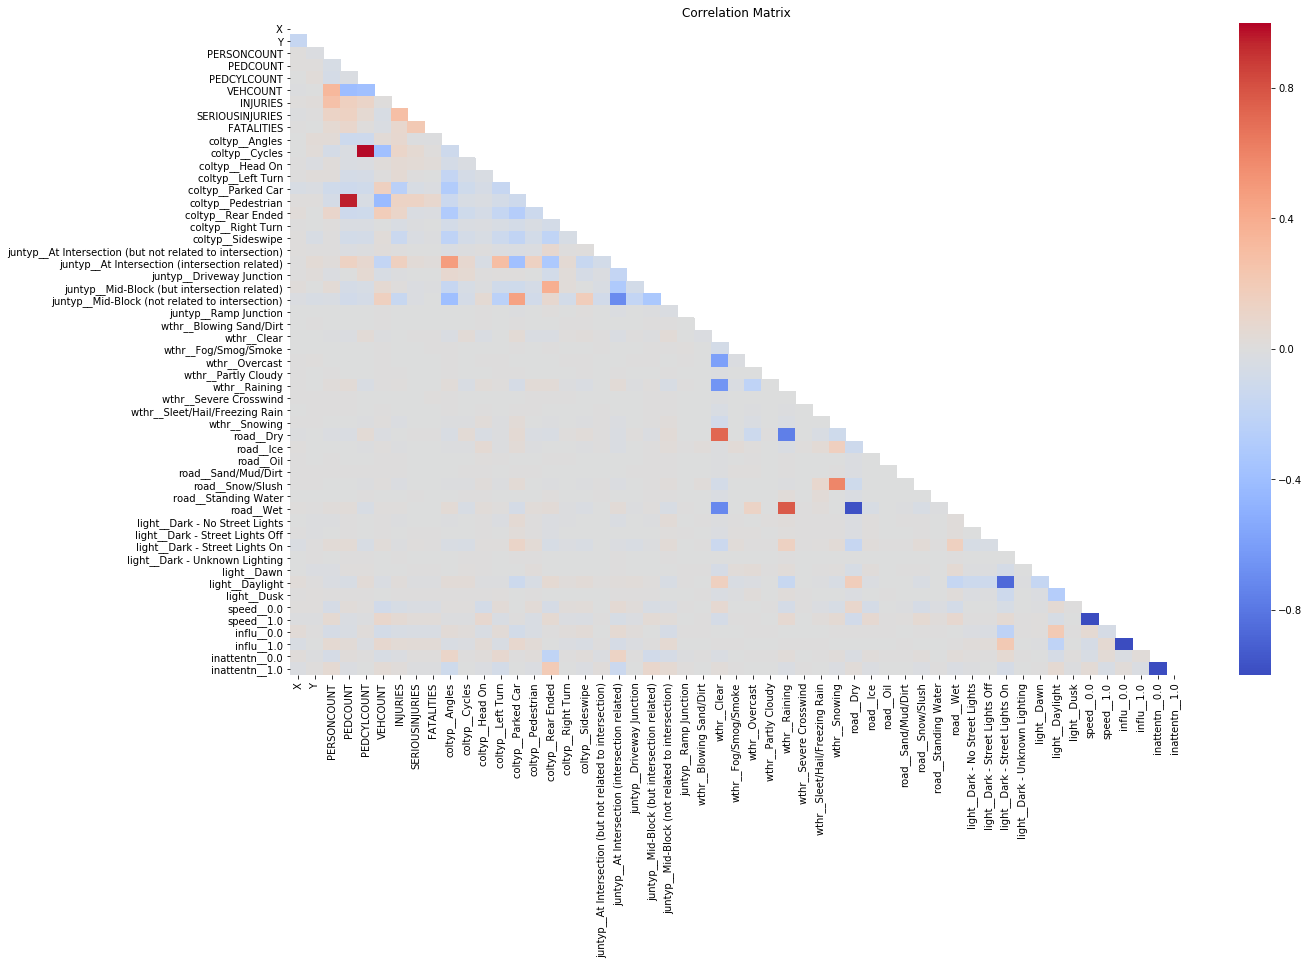

In [82]:
hm2 = colisn_df.corr()
matrix = np.triu(hm2)

plt.subplots(figsize=(20,12))
ax = sns.heatmap(hm2, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Matrix')


The datasets x and y are constructed. The set x contains all the training examples and y contains all the labels. Feature scaling of data is done to normalize the data in a dataset to a specific range.

After normalization, they are split into x_train, y_train, x_test, and y_test. The first two sets sahll be used for training and the last two shall be used for testing. Upon choosing a suitable split ratio, 80% of data is used for training and 20% of is used for testing.

In [83]:
from sklearn import preprocessing

X = colisn_df.drop(['SEVERITYCODE'], axis=1)
y = colisn_df[['SEVERITYCODE']]
colisn_df_scales = preprocessing.StandardScaler().fit(X).transform(X)
colisn_df_scales[0:2]

array([[ 0.3285132 , -0.18613501, -0.44192784, -0.22503736, -0.19877832,
        -0.07951263, -0.59091405, -0.10161491, -0.03877684, -0.5607451 ,
        -0.19861948, -0.11888049, -0.31969882, -0.51278963, -0.22589327,
        -0.5272532 , -0.13919444,  2.67172958, -0.10305883, -0.8041561 ,
        -0.21459321, -0.3755395 ,  1.15511731, -0.02760328, -0.01607438,
        -1.3613615 , -0.05389157, -0.43160492, -0.00689836,  2.0962799 ,
        -0.01042965, -0.02318016, -0.06505778, -1.63049357, -0.06839826,
        -0.01194887, -0.01428207, -0.0653207 , -0.01843933,  1.67079664,
        -0.0847884 , -0.07841466,  1.68718295, -0.00975598, -0.11725268,
        -1.45550036, -0.18701347,  0.19800852, -0.19800852,  0.21697407,
        -0.21697407,  0.45706669, -0.45706669],
       [ 0.36909949,  0.75423878, -0.44192784, -0.22503736, -0.19877832,
        -0.07951263, -0.59091405, -0.10161491, -0.03877684, -0.5607451 ,
        -0.19861948, -0.11888049, -0.31969882, -0.51278963, -0.22589327,
   

In [84]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(colisn_df_scales, y, test_size=0.2, random_state = 1)

### Modelling and Evaluation
Decision Tree makes decision with tree-like model. It splits the sample into two or more homogenous sets (leaves) based on the most significant differentiators in the input variables. To choose a differentiator (predictor), the algorithm considers all features and does a binary split on them (for categorical data, split by category; for continuous, pick a cut-off threshold). It will then choose the one with the least cost (i.e. highest accuracy), and repeats recursively, until it successfully splits the data in all leaves (or reaches the maximum depth).

Information gain for a decision tree classifier can be calculated either using the Gini Index measure or the Entropy measure, whichever gives a greater gain. A hyper parameter Decision Tree Classifier was used to decide which tree to use, DTC using entropy had greater information gain; hence it was used for this classification problem

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtree.fit(X_train, y_train)
dtree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [90]:
dtree_yhat = dtree.predict(X_test)

In [91]:
print(classification_report(y_test, dtree_yhat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     19010
           2       1.00      1.00      1.00      9863
          2b       1.00      1.00      1.00       502
           3       1.00      1.00      1.00        46

    accuracy                           1.00     29421
   macro avg       1.00      1.00      1.00     29421
weighted avg       1.00      1.00      1.00     29421



Random Forest Classifier is an ensemble (algorithms which combines more than one algorithms of same or different kind for classifying objects) tree-based learning algorithm. RFC is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object. Used for both classification and regression.

Similar to DTC, RFT requires an input that specifies a measure that is to be used for classification, along with that a value for the number of estimators (number of decision trees) is required. A hyper parameter RFT was used to determine the best choices for the above mentioned parameters. RFT with 75 DT’s using entropy as the measure gave the best accuracy when trained and tested on pre-processed accident severity dataset.

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=75)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
rfc_yhat = rfc.predict(X_test)

In [95]:
print(classification_report(y_test, rfc_yhat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     19010
           2       1.00      1.00      1.00      9863
          2b       1.00      1.00      1.00       502
           3       1.00      0.91      0.95        46

    accuracy                           1.00     29421
   macro avg       1.00      0.98      0.99     29421
weighted avg       1.00      1.00      1.00     29421



Logistic Regression is a classifier that estimates discrete values (binary values like 0/1, yes/no, true/false) based on a given set of an independent variables. It basically predicts the probability of occurrence of an event by fitting data to a logistic function. Hence it is also known as logistic regression. The values obtained would always lie within 0 and 1 since it predicts the probability.

The chosen dataset has more than two target categories in terms of the accident severity code assigned, one-vs-one (OvO) strategy is employed.

In [96]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01)
LR.fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
LR_yhat = LR.predict(X_test)

In [98]:
print(classification_report(y_test, LR_yhat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     19010
           2       1.00      1.00      1.00      9863
          2b       1.00      0.97      0.98       502
           3       1.00      0.98      0.99        46

    accuracy                           1.00     29421
   macro avg       1.00      0.99      0.99     29421
weighted avg       1.00      1.00      1.00     29421



## Results
The accuracies of all models lied was 100% which means we can accurately predict the severity of an accident. A bar plot is plotted below with the bars representing the accuracy of each model.

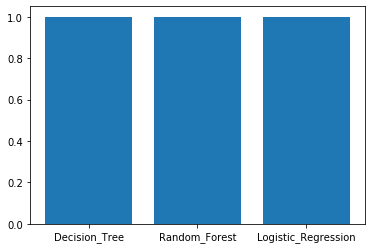

In [101]:
plt.bar(['Decision_Tree', 'Random_Forest', 'Logistic_Regression'], [1.,1.,1.])
plt.show()